**IMPORTING NECESSARY LIBRARIES**

In [38]:
import pandas as pd

stock_data = pd.read_csv('/content/sample_data/NFLX.csv',index_col='Date')

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,363.640015,368.450012,360.679993,361.480011,361.480011,4994900
2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
2023-02-08,360.019989,368.190002,358.309998,366.829987,366.829987,6253200
2023-02-09,372.410004,373.829987,361.739990,362.500000,362.500000,6901100
2023-02-10,359.160004,362.140015,347.140015,347.359985,347.359985,7291100


**Load the dataset**

**EXPLORATORY DATA ANALYSIS**

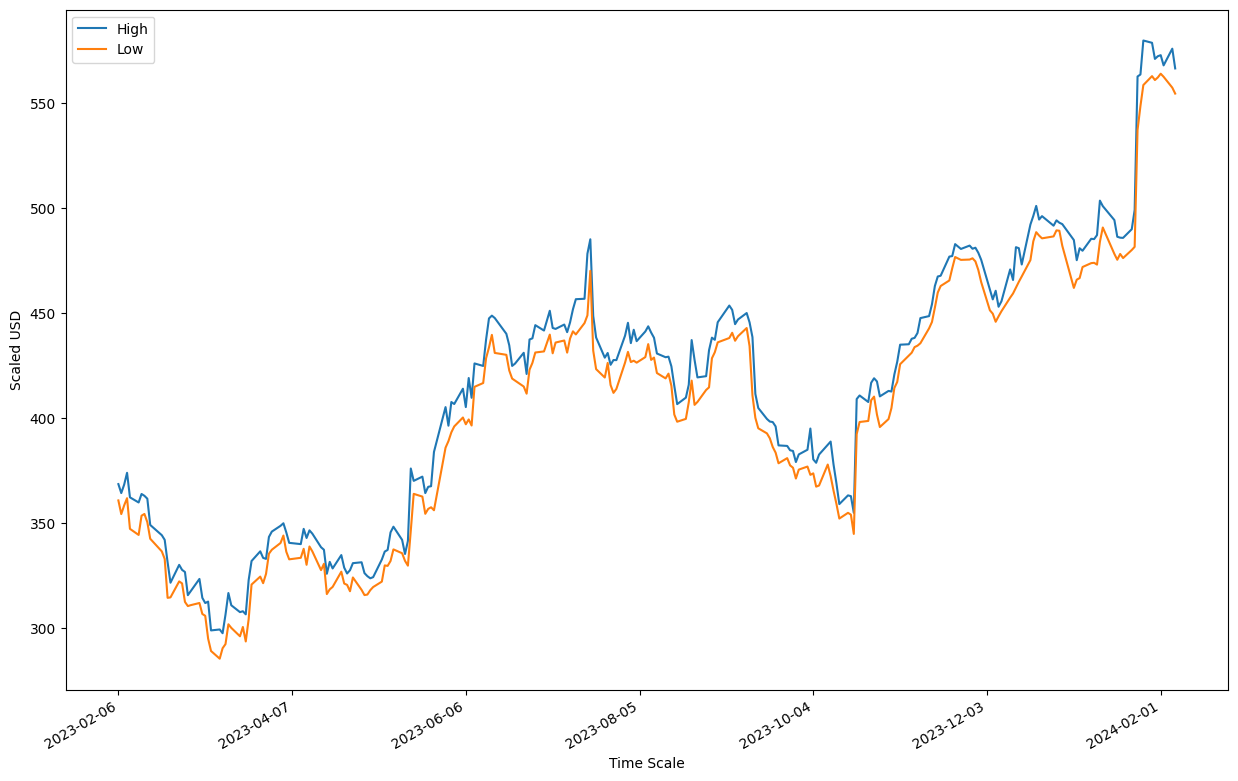

In [39]:
import matplotlib.dates as mdates

import matplotlib.pyplot as plt

import datetime as dt


plt.figure(figsize=(15,10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator (interval=60))

x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]



plt.plot(x_dates, stock_data['High'], label='High')

plt.plot(x_dates, stock_data['Low'], label='Low')

plt.xlabel('Time Scale')

plt.ylabel('Scaled USD')

plt.legend()

plt.gcf().autofmt_xdate()

plt.show()

**DATA PREPROCESSING**

In [40]:
target_y = stock_data['Close']

X_feat = stock_data.iloc[:,0:3]

In [41]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import *

from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error

In [43]:
#Feature Scaling

sc = StandardScaler()

X_ft = sc.fit_transform(X_feat.values)

X_ft = pd.DataFrame(columns=X_feat.columns,data=X_ft,index=X_feat.index)

In [44]:
def lstm_split(data, n_steps):
  X,y=[],[]

  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])
  return np.array(X), np.array (y)

**Visualize key statistics and trends**

**TRAINING AND TESTING**

In [45]:
X1, y1 = lstm_split(stock_data.values, n_steps=2)



train_split=0.8

split_idx = int(np.ceil(len(X1)*train_split))

date_index = stock_data.index



X_train, X_test = X1[:split_idx], X1[split_idx:]

y_train, y_test = y1[: split_idx], y1[split_idx:]

X_train_date, x_test_date = date_index[:split_idx], date_index[split_idx:]



print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(251, 2, 5) (201, 2, 5) (50, 2, 5) (50,)


**USING LSTM MODEL**

In [46]:
lstm = Sequential()

lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences=True))

lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error', optimizer='adam')

lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 32)             4864      
                                                                 
 dense_3 (Dense)             (None, 2, 1)              33        
                                                                 
Total params: 4897 (19.13 KB)
Trainable params: 4897 (19.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Predictive Modeling**

Prepare data


In [47]:
history=lstm.fit(X_train, y_train,epochs=100, batch_size=4,verbose=2, shuffle=False)

Epoch 1/100
51/51 - 2s - loss: 53804359745536.0000 - 2s/epoch - 30ms/step
Epoch 2/100
51/51 - 0s - loss: 53799125254144.0000 - 115ms/epoch - 2ms/step
Epoch 3/100
51/51 - 0s - loss: 53790535319552.0000 - 115ms/epoch - 2ms/step
Epoch 4/100
51/51 - 0s - loss: 53776408903680.0000 - 114ms/epoch - 2ms/step
Epoch 5/100
51/51 - 0s - loss: 53753734496256.0000 - 114ms/epoch - 2ms/step
Epoch 6/100
51/51 - 0s - loss: 53720666603520.0000 - 118ms/epoch - 2ms/step
Epoch 7/100
51/51 - 0s - loss: 53675196153856.0000 - 121ms/epoch - 2ms/step
Epoch 8/100
51/51 - 0s - loss: 53615381184512.0000 - 116ms/epoch - 2ms/step
Epoch 9/100
51/51 - 0s - loss: 53539405561856.0000 - 115ms/epoch - 2ms/step
Epoch 10/100
51/51 - 0s - loss: 53445595758592.0000 - 120ms/epoch - 2ms/step
Epoch 11/100
51/51 - 0s - loss: 53332399882240.0000 - 118ms/epoch - 2ms/step
Epoch 12/100
51/51 - 0s - loss: 53198526087168.0000 - 115ms/epoch - 2ms/step
Epoch 13/100
51/51 - 0s - loss: 53042871271424.0000 - 121ms/epoch - 2ms/step
Epoch 14/1

**Performance Evaluation on Test Set**

In [48]:
y_pred = lstm.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [49]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)

In [50]:
lstm = Sequential()

lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences=True))

lstm.add(LSTM(50, activation= 'relu'))

lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 2, 50)             11200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
n_steps=10

x1, y1 = lstm_split(stock_data.values, n_steps=n_steps)


train_split=0.8

split_idx = int(np.ceil(len(X1)*train_split))

date_index = stock_data.index


X_train, X_test = X1[: split_idx], X1[split_idx:]

y_train, y_test = y1[: split_idx], y1[split_idx:]

X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(x1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)



(243, 10, 5) (201, 2, 5) (50, 2, 5) (41,) (42,)


Test RMSE: 50.212
Test MAPE: 0.069


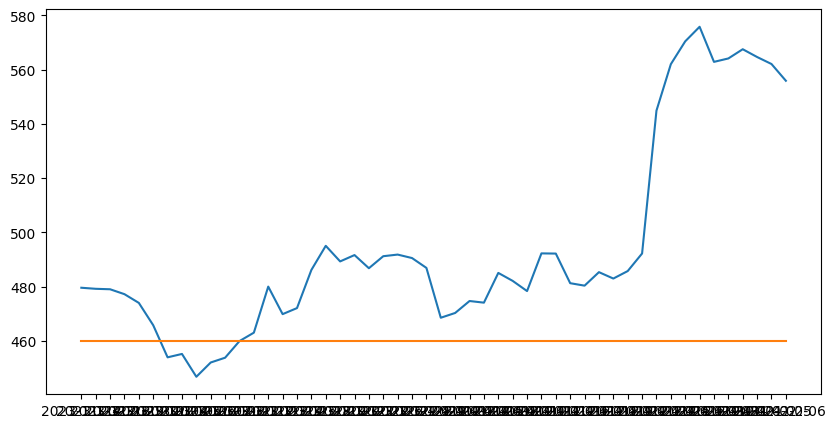

In [52]:
train_split = 0.8

split_idx = int(np.ceil(len(stock_data)*train_split))

train = stock_data[['Close']].iloc[:split_idx]

test = stock_data[['Close']].iloc[split_idx:]



test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))



print('Test RMSE: %.3f' % mean_squared_error(test, test_pred, squared=False))

print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))

plt.plot(test)

plt.plot(test_pred)

plt.show()